In [2]:
# driver_behavior_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:

df = pd.read_csv(r'C:\Users\praje\OneDrive\AppData\Desktop\project\UYIR\Synthetic_dataset_generation\synthetic_driving_data_with_behavior_and_accident.csv')



X = df.drop(columns=['accident_severity', 'driver_behavior'])
y = df['driver_behavior']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

In [5]:

joblib.dump(scaler, 'scaler.pkl')


X_test_scaled = scaler.transform(X_test)
behavior_model = RandomForestClassifier(n_estimators=100, random_state=42)
behavior_model.fit(X_train_scaled, y_train)


joblib.dump(behavior_model, 'driver_behavior_model.pkl')

['driver_behavior_model.pkl']

In [6]:

y_pred = behavior_model.predict(X_test_scaled)


print("Driver Behavior Classification Report:")
print(classification_report(y_test, y_pred))

Driver Behavior Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       296
           2       0.00      0.00      0.00         4

    accuracy                           0.99       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.99      0.98       300



c:\Users\praje\OneDrive\AppData\Desktop\project\UYIR\work\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\praje\OneDrive\AppData\Desktop\project\UYIR\work\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\praje\OneDrive\AppData\Desktop\project\UYIR\work\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

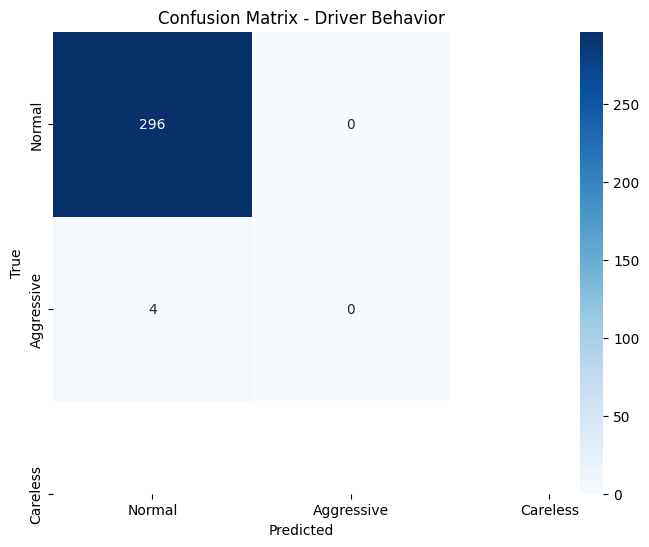

In [7]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Aggressive', 'Careless'],
            yticklabels=['Normal', 'Aggressive', 'Careless'])
plt.title('Confusion Matrix - Driver Behavior')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()